# 用户信息分析

In [4]:
import pandas as pd

dfblack = pd.read_excel("./new_tweets/black-myth_2024-08-20_2024-09-30.xlsx",sheet_name="Users")
dfliziqi = pd.read_excel("./new_tweets/liziqi_2024-11-01_2024-11-16.xlsx",sheet_name="Users")

print(dfblack.columns)
print(dfliziqi.columns)

Index(['user_id', 'user_name', 'display_name', 'user_url', 'profile_picture',
       'header_photo', 'bio', 'location', 'website_link', 'birthday',
       'followers_count', 'following_count', 'tweets_count', 'likes_count',
       'media_count', 'listed_count', 'join_date', 'auth', 'professional',
       'protected'],
      dtype='object')
Index(['user_id', 'user_name', 'display_name', 'user_url', 'profile_picture',
       'header_photo', 'bio', 'location', 'website_link', 'birthday',
       'followers_count', 'following_count', 'tweets_count', 'likes_count',
       'media_count', 'listed_count', 'join_date', 'auth', 'professional',
       'protected'],
      dtype='object')


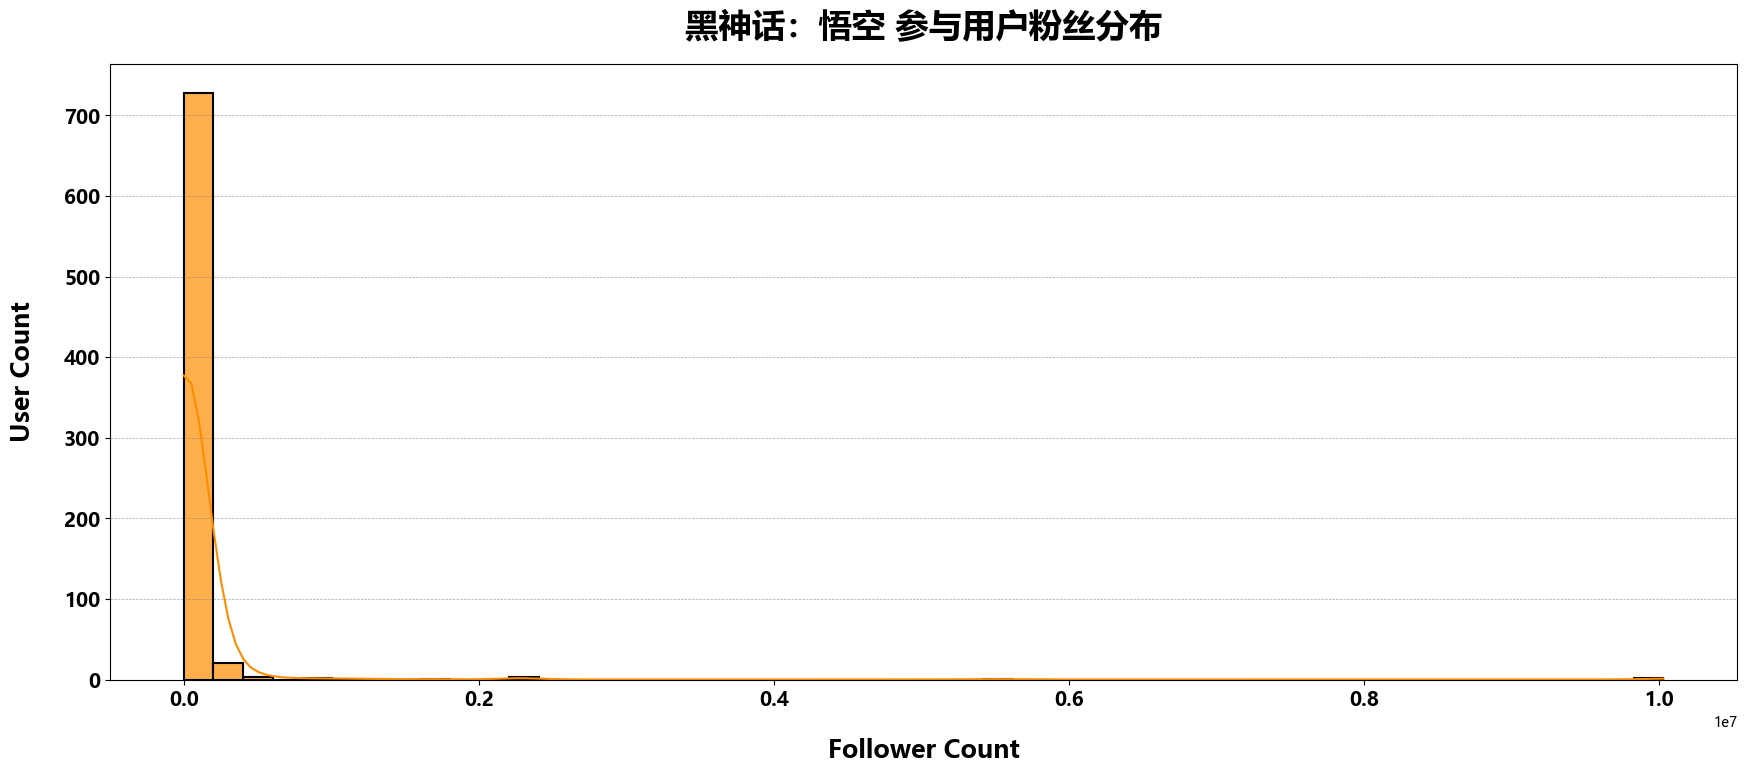

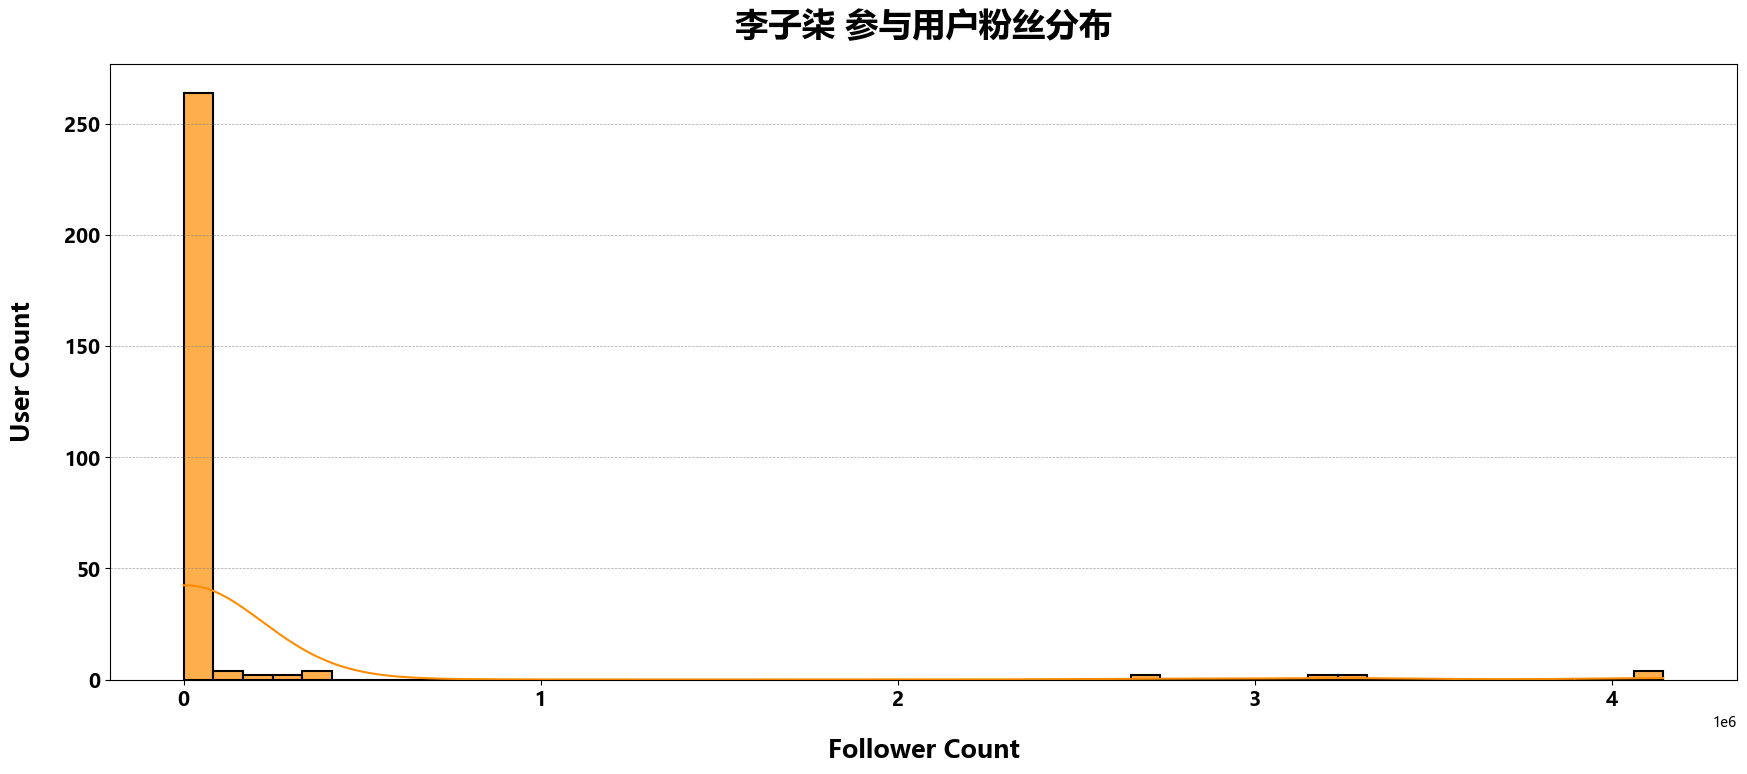

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False


# 数据清理
def clean_and_filter_data(df, column="followers_count"):
    """
    清理和过滤粉丝数据
    :param df: DataFrame 数据
    :param column: 需要分析的列（默认 'followers_count'）
    :return: 清理后的 DataFrame
    """
    # 移除无效数据
    df = df[df[column].notna()]
    df = df[df[column] > 0]  # 只保留粉丝数大于 0 的用户
    return df

df_black_cleaned = clean_and_filter_data(dfblack)
df_liziqi_cleaned = clean_and_filter_data(dfliziqi)


# 对数据做


# 数据可视化：绘制条形图和 KDE 图
def plot_follower_distribution(df, title, output_path=None):
    """
    绘制用户粉丝分布图
    :param df: DataFrame 数据
    :param title: 图表标题
    :param output_path: 保存图表的路径
    """
    plt.figure(figsize=(21, 8))
    # 绘制直方图和 KDE 曲线
    sns.histplot(
        data=df,
        x="followers_count",
        bins=50,
        kde=True,
        color="darkorange",
        edgecolor="black",
        linewidth=1.5,
        alpha=0.7
    )
    plt.title(title, fontsize=24, fontweight="bold", pad=20)
    plt.xlabel("Follower Count", fontsize=18, fontweight="bold", labelpad=20)
    plt.ylabel("User Count", fontsize=18, fontweight="bold", labelpad=20)
    plt.xticks(fontsize=14, fontweight="bold")
    plt.yticks(fontsize=14, fontweight="bold")
    plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7, color="gray")

    if output_path:
        plt.savefig(output_path, bbox_inches="tight", dpi=300)
    plt.show()

# 分别可视化黑神话和李子柒的用户粉丝数分布
plot_follower_distribution(df_black_cleaned, title="黑神话：悟空 参与用户粉丝分布", output_path="black_follower_distribution.png")
plot_follower_distribution(df_liziqi_cleaned, title="李子柒 参与用户粉丝分布", output_path="liziqi_follower_distribution.png")

C:\Users\23779\AppData\Local\Temp\ipykernel_1516\3013493398.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\23779\AppData\Local\Temp\ipykernel_1516\3013493398.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


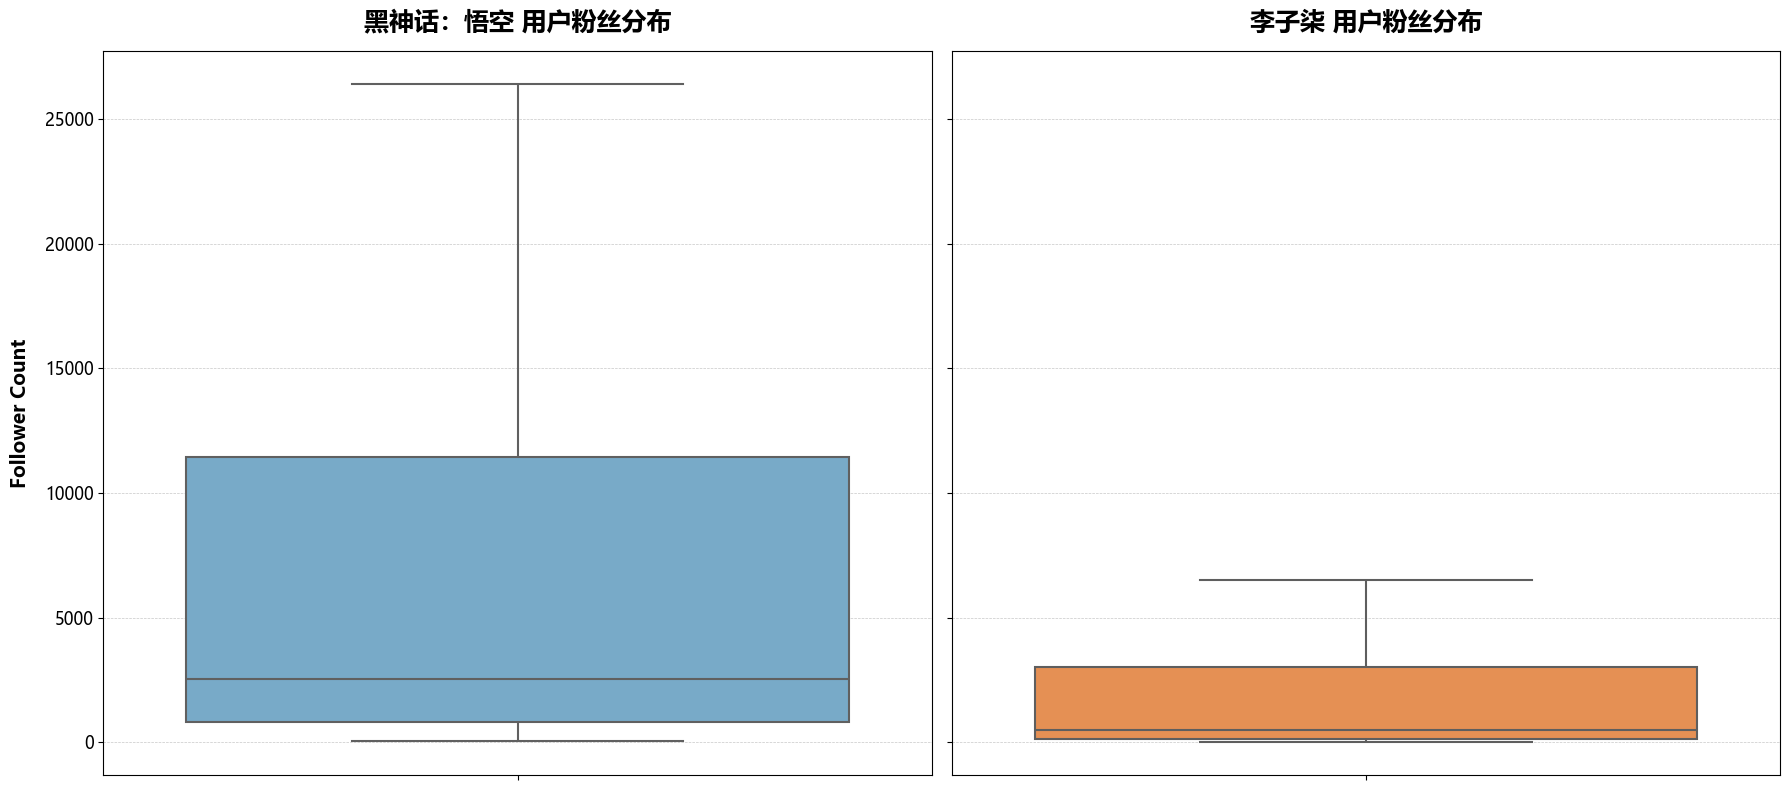

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置默认字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据加载
df_black = pd.read_excel("./new_tweets/black-myth_2024-08-20_2024-09-30.xlsx", sheet_name="Users")
df_liziqi = pd.read_excel("./new_tweets/liziqi_2024-11-01_2024-11-16.xlsx", sheet_name="Users")

# 数据清理
def clean_and_filter_data(df, column="followers_count", max_threshold=None):
    """
    清理和过滤粉丝数据
    :param df: DataFrame 数据
    :param column: 需要分析的列（默认 'followers_count'）
    :param max_threshold: 最大值过滤（用于排除极端值）
    :return: 清理后的 DataFrame
    """
    df = df[df[column].notna()]  # 去除缺失值
    df = df[df[column] > 0]      # 去除非正值
    if max_threshold:
        df = df[df[column] <= max_threshold]  # 过滤过高的值
    return df

# 清理数据，过滤掉异常高值（假设100万以上为异常值）
df_black_cleaned = clean_and_filter_data(df_black, max_threshold=1_000_000)
df_liziqi_cleaned = clean_and_filter_data(df_liziqi, max_threshold=1_000_000)

# 绘制横向排列的箱线图
def plot_follower_distribution_separate_boxplots(df_black, df_liziqi, column, titles, output_path=None):
    """
    分别绘制“黑神话：悟空”和“李子柒”的粉丝分布箱线图，横向排列。
    :param df_black: 黑神话数据 DataFrame
    :param df_liziqi: 李子柒数据 DataFrame
    :param column: 粉丝数量列名
    :param titles: 图表标题列表
    :param output_path: 保存图表路径
    """
    fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

    # 绘制第一个箱线图（黑神话）
    sns.boxplot(
        data=df_black,
        y=column,
        ax=axes[0],
        palette="Blues",
        showfliers=False,
        linewidth=1.5
    )
    axes[0].set_title(titles[0], fontsize=18, fontweight="bold", pad=15)
    axes[0].set_ylabel("Follower Count", fontsize=14, fontweight="bold", labelpad=10)
    axes[0].set_xlabel("")
    axes[0].tick_params(axis="y", labelsize=12)
    axes[0].grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

    # 绘制第二个箱线图（李子柒）
    sns.boxplot(
        data=df_liziqi,
        y=column,
        ax=axes[1],
        palette="Oranges",
        showfliers=False,
        linewidth=1.5
    )
    axes[1].set_title(titles[1], fontsize=18, fontweight="bold", pad=15)
    axes[1].set_xlabel("")
    axes[1].tick_params(axis="y", labelsize=12)
    axes[1].grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

    # 调整整体布局
    plt.tight_layout()

    # 保存图片
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()


# 使用函数绘制
plot_follower_distribution_separate_boxplots(
    df_black=df_black_cleaned,
    df_liziqi=df_liziqi_cleaned,
    column="followers_count",
    titles=["黑神话：悟空 用户粉丝分布", "李子柒 用户粉丝分布"],
    output_path="follower_distribution_separate_boxplots.png"
)
